# Genotype Mutation-Pair Frequency Analysis Program

This is a program that takes in the mut_arrival.txt file from Boni Lab's IBM and returns a series of visuals for further analysis.

## 1. Frequency Count and Heatmap Plot Function

This function reads in the output csv file and count the frequency of each mutation pair, storing the results in a 128x128 2D array. Then uses seaborn to plot the heatmap.

In [0]:
import numpy as np
import pandas as pd
import csv

# User-defined variables
filepath = 'mut_arrival.txt'

# Initiate 128x128 grid to store pairwise frequency
# Note: row index for `from`, column index for `to`
mut_pair_freq = np.zeros((128,128), dtype=int)

with open(filepath) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row in csv_reader:
    # excluding all burn-in phase data
    if int(row[0]) > 10*365:
      fromid = int(row[1])
      toid = int(row[2])
      mut_pair_freq[fromid][toid] += 1

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(111.5, 0.5, 'from'), Text(0.5, 84.5, 'to')]

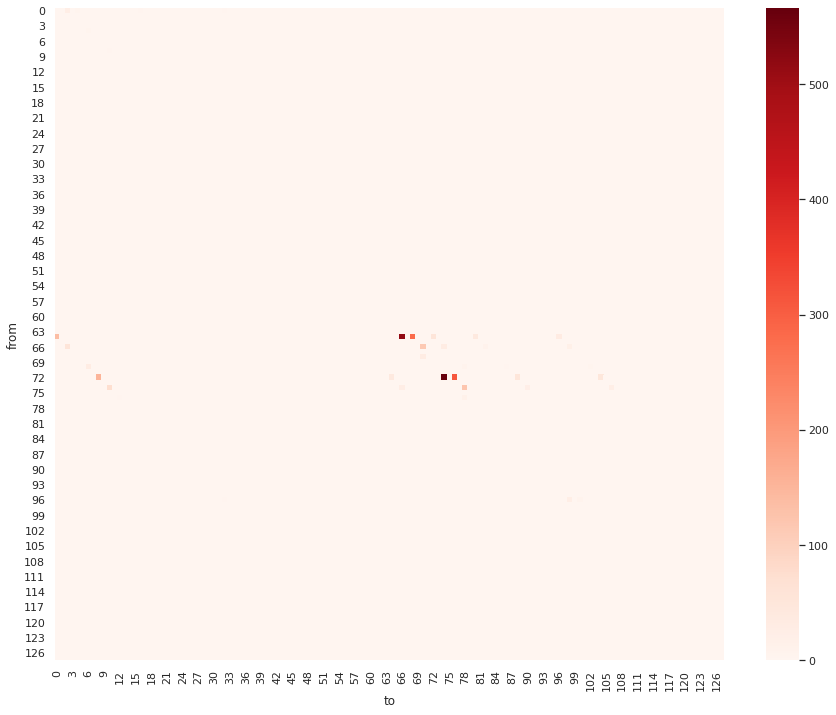

In [0]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,12)})

ax = sns.heatmap(mut_pair_freq, cmap="Reds")
ax.set(xlabel='to', ylabel='from')

## 2. Find *n* Most-frequent Mutation-pairs

This function takes in a number *n*, and find the index and value of the maximum in the 2D array, for *n* times, intending to find the *n* most-frequent mutation pairs in the simulation.

The output is in the form of (*from_id*, *to_id*, *frequency*).

###### Genotype Encoding Database

In [0]:
geno_database = {
  "0": "KNY--C1x",
  "1": "KNY--C1X",
  "2": "KNY--C2x",
  "3": "KNY--C2X",
  "4": "KNY--Y1x",
  "5": "KNY--Y1X",
  "6": "KNY--Y2x",
  "7": "KNY--Y2X",
  "8": "KYY--C1x",
  "9": "KYY--C1X",
  "10": "KYY--C2x",
  "11": "KYY--C2X",
  "12": "KYY--Y1x",
  "13": "KYY--Y1X",
  "14": "KYY--Y2x",
  "15": "KYY--Y2X",
  "16": "KNF--C1x",
  "17": "KNF--C1X",
  "18": "KNF--C2x",
  "19": "KNF--C2X",
  "20": "KNF--Y1x",
  "21": "KNF--Y1X",
  "22": "KNF--Y2x",
  "23": "KNF--Y2X",
  "24": "KYF--C1x",
  "25": "KYF--C1X",
  "26": "KYF--C2x",
  "27": "KYF--C2X",
  "28": "KYF--Y1x",
  "29": "KYF--Y1X",
  "30": "KYF--Y2x",
  "31": "KYF--Y2X",
  "32": "KNYNYC1x",
  "33": "KNYNYC1X",
  "34": "KNYNYC2x",
  "35": "KNYNYC2X",
  "36": "KNYNYY1x",
  "37": "KNYNYY1X",
  "38": "KNYNYY2x",
  "39": "KNYNYY2X",
  "40": "KYYYYC1x",
  "41": "KYYYYC1X",
  "42": "KYYYYC2x",
  "43": "KYYYYC2X",
  "44": "KYYYYY1x",
  "45": "KYYYYY1X",
  "46": "KYYYYY2x",
  "47": "KYYYYY2X",
  "48": "KNFNFC1x",
  "49": "KNFNFC1X",
  "50": "KNFNFC2x",
  "51": "KNFNFC2X",
  "52": "KNFNFY1x",
  "53": "KNFNFY1X",
  "54": "KNFNFY2x",
  "55": "KNFNFY2X",
  "56": "KYFYFC1x",
  "57": "KYFYFC1X",
  "58": "KYFYFC2x",
  "59": "KYFYFC2X",
  "60": "KYFYFY1x",
  "61": "KYFYFY1X",
  "62": "KYFYFY2x",
  "63": "KYFYFY2X",
  "64": "TNY--C1x",
  "65": "TNY--C1X",
  "66": "TNY--C2x",
  "67": "TNY--C2X",
  "68": "TNY--Y1x",
  "69": "TNY--Y1X",
  "70": "TNY--Y2x",
  "71": "TNY--Y2X",
  "72": "TYY--C1x",
  "73": "TYY--C1X",
  "74": "TYY--C2x",
  "75": "TYY--C2X",
  "76": "TYY--Y1x",
  "77": "TYY--Y1X",
  "78": "TYY--Y2x",
  "79": "TYY--Y2X",
  "80": "TNF--C1x",
  "81": "TNF--C1X",
  "82": "TNF--C2x",
  "83": "TNF--C2X",
  "84": "TNF--Y1x",
  "85": "TNF--Y1X",
  "86": "TNF--Y2x",
  "87": "TNF--Y2X",
  "88": "TYF--C1x",
  "89": "TYF--C1X",
  "90": "TYF--C2x",
  "91": "TYF--C2X",
  "92": "TYF--Y1x",
  "93": "TYF--Y1X",
  "94": "TYF--Y2x",
  "95": "TYF--Y2X",
  "96": "TNYNYC1x",
  "97": "TNYNYC1X",
  "98": "TNYNYC2x",
  "99": "TNYNYC2X",
  "100": "TNYNYY1x",
  "101": "TNYNYY1X",
  "102": "TNYNYY2x",
  "103": "TNYNYY2X",
  "104": "TYYYYC1x",
  "105": "TYYYYC1X",
  "106": "TYYYYC2x",
  "107": "TYYYYC2X",
  "108": "TYYYYY1x",
  "109": "TYYYYY1X",
  "110": "TYYYYY2x",
  "111": "TYYYYY2X",
  "112": "TNFNFC1x",
  "113": "TNFNFC1X",
  "114": "TNFNFC2x",
  "115": "TNFNFC2X",
  "116": "TNFNFY1x",
  "117": "TNFNFY1X",
  "118": "TNFNFY2x",
  "119": "TNFNFY2X",
  "120": "TYFYFC1x",
  "121": "TYFYFC1X",
  "122": "TYFYFC2x",
  "123": "TYFYFC2X",
  "124": "TYFYFY1x",
  "125": "TYFYFY1X",
  "126": "TYFYFY2x",
  "127": "TYFYFY2X",
}

###### highest $n$ mutation-pair report

In [0]:
from numpy import unravel_index

n = 2
result = ""
data_highest = mut_pair_freq.copy()
for i in range(n):
  (from_id, to_id) = unravel_index(data_highest.argmax(), data_highest.shape)
  freq = data_highest[from_id][to_id]
  data_highest[from_id][to_id] = -1
  result += "freq = %s, at [%s -> %s], meaning [%s -> %s]\n" % (freq, from_id, to_id, geno_database[str(from_id)], geno_database[str(to_id)])

In [19]:
print(result)

freq = 566, at [72 -> 74], meaning [TYY--C1x -> TYY--C2x]
freq = 516, at [64 -> 66], meaning [TNY--C1x -> TNY--C2x]



## 3. Mutation Pair Range Visual

This function adds 300 to every non-zero frequency in the 2D array, intending to increase and contrast in heatmap and see the range of all mutation pairs.

In [0]:
data = mut_pair_freq.copy()
for x in range(0, data.shape[0]):
  for y in range(0, data.shape[1]):
    if data[x][y] != 0:
      data[x][y] += 300

[Text(111.5, 0.5, 'from'), Text(0.5, 84.5, 'to')]

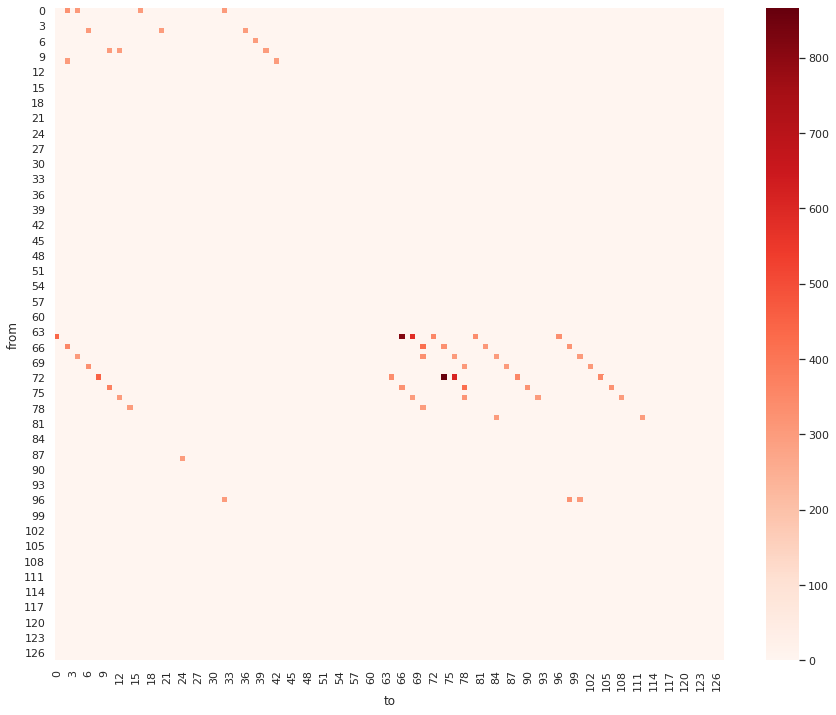

In [0]:
ax = sns.heatmap(data, cmap="Reds")
ax.set(xlabel='to', ylabel='from')

## ARCHIVED - Old Heatmap Function using Dataframe

```
max_freq = mut_pair_freq.max().max()
col_loc = 0
row_loc = 0
# column location for the max
for eachcol in mut_pair_freq.max().iteritems():
  if eachcol[1] == max_freq:
    col_loc = eachcol[0]
# row location for the max
for eachrow in mut_pair_freq.max(axis=1).iteritems():
  if eachrow[1] == max_freq:
    row_loc = eachrow[0]

print('%s = %s, at row/from %s, col/to %s' % (max_freq, mut_pair_freq.iloc[row_loc][col_loc], row_loc, col_loc))
```